In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import random

# Parameters
t0 = 0  # Initial time
tf = 20  # Final time
dt = 0.01  # Time step
y0 = np.pi / 2  # Initial position
v0 = 0  # Initial velocity
a0 = -1  # Initial acceleration
b = 0.1  # Damping constant

# Number of time steps
num_steps = int((tf - t0) / dt)

# Define the function f(t, y, z) for the second-order ODE
def f(t, y, y_t):
    return -np.sin(y) - b * y_t  # Example: damped pendulum


# Arrays to store time, position, and velocity
t_values = np.linspace(t0, tf, num_steps + 1)
y_values = np.zeros(num_steps + 1)
y_t_values = np.zeros(num_steps + 1)
y_tt_values = np.zeros(num_steps + 1)
y_values[0] = y0
y_t_values[0] = v0
y_tt_values[0] = a0

# Euler's method for solving the system of second-order ODEs
for i in range(num_steps):
    y_tt_values[i+1] = f(t_values[i], y_values[i], y_t_values[i])
    y_t_values[i+1] = y_t_values[i] + dt * y_tt_values[i+1]
    y_values[i+1] = y_values[i] + dt * y_t_values[i+1]


In [2]:
print (y_tt_values)

[-1.         -1.         -0.999      ... -0.51723213 -0.51747671
 -0.51767611]


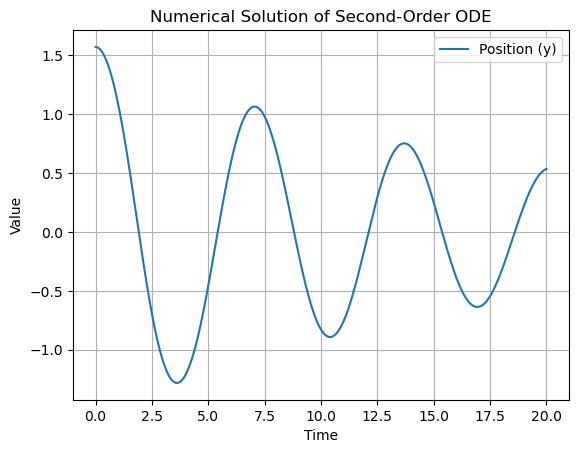

In [3]:
# Plot the solution
plt.plot(t_values, y_values, label='Position (y)')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Numerical Solution of Second-Order ODE')
plt.legend()
plt.grid(True)
plt.show()


In [4]:
# Downsample the data 

# Desired size of the downsampled lists
downsampled_size = 50

# Shuffle indices
shuffled_indices = list(range(len(t_values)//2)) # here we only use the first half of the data
random.shuffle(shuffled_indices)

# Select elements based on shuffled indices
downsampled_t_values = [t_values[i] for i in shuffled_indices[:downsampled_size]]
downsampled_y_values = [y_values[i] for i in shuffled_indices[:downsampled_size]]

# Add noise to the downsampled data
noise = 0.2
downsampled_y_values = [y + noise * np.random.normal() for y in downsampled_y_values]

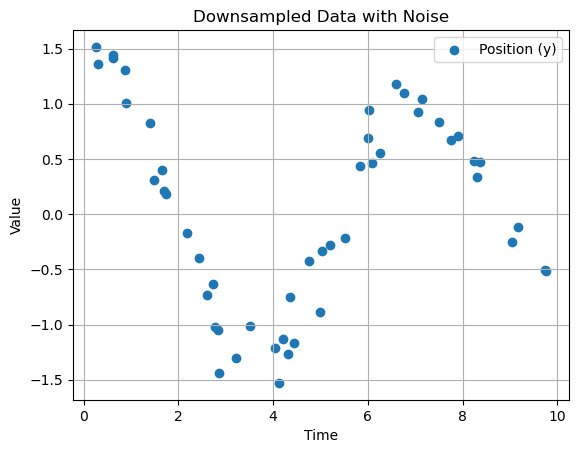

In [5]:
# plot the downsampled data
plt.scatter(downsampled_t_values, downsampled_y_values, label='Position (y)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Downsampled Data with Noise')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
# save the data in a json file
import json

# save the downsampled data in a json file
data = {
    "t_values": downsampled_t_values,
    "y_values": downsampled_y_values
}

with open("testdata/oscillation_data.json", "w") as outfile:
    json.dump(data, outfile)


# save the original data in a json file
data = {
    "t_values": t_values.tolist(),
    "y_values": y_values.tolist()
}

with open("testdata/oscillation_data_original.json", "w") as outfile:
    json.dump(data, outfile)

In [ ]:
# import jax and relevant libraries
import jax.random as jr
import jax.numpy as jnp
import gpjax as gpx
from jax import jit
from jax import config

# 
config.update("jax_enable_x64", True)
cols = mpl.rcParams["axes.prop_cycle"].by_key()["color"]
key = jr.PRNGKey(123)
key, subkey = jr.split(key)

In [ ]:
mean = gpx.mean_functions.Zero()
kernel = gpx.kernels.RBF()
prior = gpx.gps.Prior(mean_function = mean, kernel = kernel)